In [9]:
using Pkg
# Switch to the desired Julia environment
Pkg.activate("C:/Users/Public/code/Fish-Brain-Behavior-Analysis/code/data_analysis_Weihao/ERM_paper/")


include("C:/Users/Public/code/Fish-Brain-Behavior-Analysis/code/data_analysis_Weihao/ERM_paper/src/util.jl") # ZZ's code
include("C:/Users/Public/code/Fish-Brain-Behavior-Analysis/code/data_analysis_Weihao/ERM_paper/src/util2.jl")
import PyPlot as plt

  Activating project at `C:\Users\Public\code\Fish-Brain-Behavior-Analysis\code\data_analysis_Weihao\ERM_paper`


In [10]:
N = 2^10 #number of neurons
# ρ = 100#density = N/L^2
d = 2 #dimensionality
L = 10#(N/ρ)^(1/d) #box size
ξ = 10^18
δ = 0.1
#ϵ = δ*density^(-1/d)
ϵ = 0.03125
#ϵ = 0.1
μ = 0.5
β = 0
# L = (N/ρ)^(1/n)
ρ = N/L^d

10.24

In [11]:
different_neural_variability = false
if different_neural_variability
    σ² = vec(rand(LogNormal(0,0.5),N,1))
else
    σ² = ones(N,1)
end

#σ² = σ²/mean(σ²) #normalize so that σ̄² = 1
σ = vec(broadcast(√,σ²))
Δ = diagm(σ)

p = ERMParameter(;N = N, L = L, ρ = ρ, n = d, ϵ = ϵ, μ = μ, ξ = ξ, σ̄² = mean(σ²), σ̄⁴ = mean(σ².^2))

#=
N number of neurons
L box size
ρ density
n dimensionality
ϵ parameter in distance function f
μ parameter in distance function f
ξ parameter in distance function f
β = 1/ξ parameter in distance function f
σ̄² mean variance of neural activity
σ̄⁴ mean 4th moment of neural activity
#parameters in the ERM model
=#

ERMParameter
  N: Int64 1024
  L: Float64 10.0
  ρ: Float64 10.24
  n: Int64 2
  ϵ: Float64 0.03125
  μ: Float64 0.5
  ξ: Float64 1.0e18
  β: Float64 1.0e-18
  σ̄²: Float64 1.0
  σ̄⁴: Float64 1.0


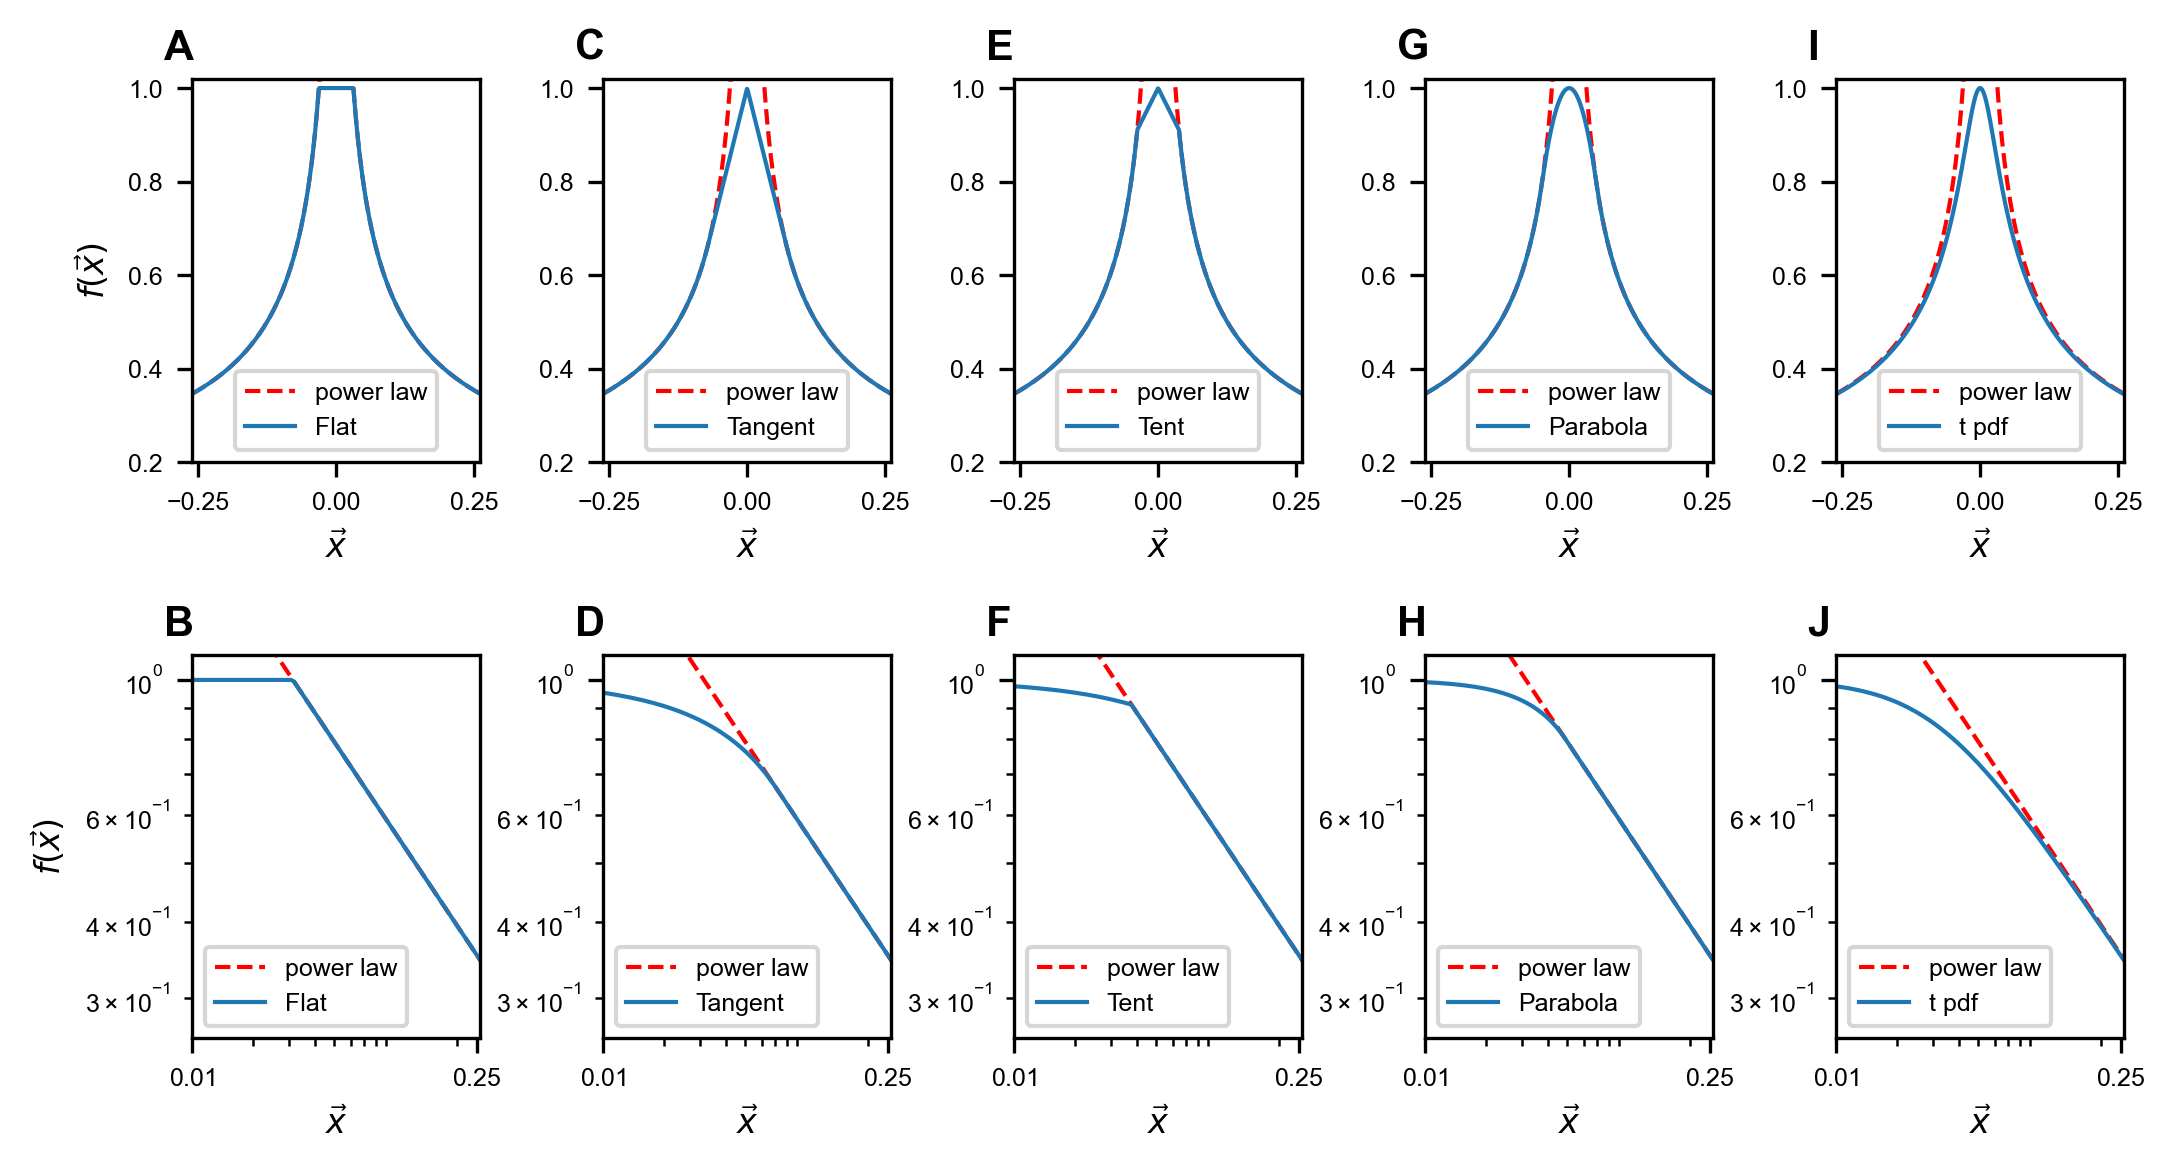

In [27]:
uppercase_letters = ["A","B","C","D","E","F","G","H","I","J","K","L","M"]
fig = plt.figure(figsize=(6.85,4),facecolor="w",frameon=true, dpi=300)
plt.rc("font",size=6,family="Arial")
plt.rc("pdf", fonttype=42)
yratio = 6.85/3


#########################
##----ERM property-----##
#########################
x00 = range(0.08, length=5, step=0.2) # x position 
y00 = [.6, .12] # y position
xs = 0.14 # length of x axis
ys = xs * yratio # length of y axis
ipanel = 0


N = 2^10 #number of neurons
d = 2 #dimensionality
L = 10 #(N/ρ)^(1/d) #box size
ξ = 10^18
δ = 0.1
ϵ = 0.03125
μ = 0.5
β = 0
ρ = N/L^d
p = ERMParameter(;N = N, L = L, ρ = ρ, n = d, ϵ = ϵ, μ = μ, ξ = ξ, β = β, σ̄² = mean(σ²), σ̄⁴ = mean(σ².^2))


####################################
####################################
label_name = ["Flat", "Tangent", "Tent", "Parabola", "t pdf"]

x_ls = [-L/30:0.001:L/30;]

for i_fr = 1:5
    if i_fr == 1
        f_r_tmp = f_r_power_law_flat
    elseif i_fr == 2
        f_r_tmp = f_r_power_law_tent # tangent
    elseif i_fr == 3
        f_r_tmp = (r,p) -> f_r_power_law_tent(r::Any, p::ERMParameter;flag_tangent=false)
    elseif i_fr == 4
        f_r_tmp = f_r_power_law_parabola
    elseif i_fr == 5
        f_r_tmp = f_r_t_pdf
    end

    ##########
    ## f(x) ##
    ##########
    ipanel+=1
    ax = fig.add_axes([x00[i_fr], y00[1], xs,ys])
    a0=f_r_power_law(abs.(x_ls),p)
    a = f_r_tmp(abs.(x_ls),p)
    ax.plot(x_ls,a0,ls="--",color="red",lw=1,label="power law")
    ax.plot(x_ls,a,lw=1,label=label_name[i_fr])
    ax.set_xlim((-0.26,0.26))
    ax.set_ylim((0.2,1.02))
    ax.set_xticks([-0.25,0, 0.25])

    ax.set_xlabel(L"\vec{x}",fontsize=8)
    if ipanel == 1 || ipanel == 2
        ax.set_ylabel(L"f(\vec{x})",fontsize=8)
    end
    ax.legend()
    ax.text(-0.1, 1.05, uppercase_letters[ipanel],transform=ax.transAxes, size=10,weight="bold")
    
    #############
    ## log-log ##
    #############
    ipanel+=1
    ax = fig.add_axes([x00[i_fr], y00[2], xs,ys])
    a0=f_r_power_law(abs.(x_ls),p)
    a = f_r_tmp(abs.(x_ls),p)
    ax.loglog(x_ls,a0,ls="--",color="red",lw=1,label="power law")
    ax.loglog(x_ls,a,lw=1,label=label_name[i_fr])
    ax.set_xlim((0.01,0.26))
    ax.set_xticks([0.01, 0.25])
    formatter = plt.matplotlib.ticker.ScalarFormatter(useMathText=true)
    # formatter.set_scientific(true)
    # formatter.set_powerlimits((-1,1))
    ax.get_xaxis().set_major_formatter(formatter)
    ax.set_xlabel(L"\vec{x}",fontsize=8)
    if ipanel == 1 || ipanel == 2
        ax.set_ylabel(L"f(\vec{x})",fontsize=8)
    end
    # ax.set_ylabel(L"f(\vec{x})",fontsize=8)
    ax.set_ylim(top=1.1)
    ax.legend()
    ### leter for the panel ###
    ax.text(-0.1,1.05, uppercase_letters[ipanel],transform=ax.transAxes, size=10,weight="bold")

end

plt.gcf()


In [29]:
fig.savefig("suppfig_power_law_fx.pdf", format="pdf", bbox_inches="tight")

In [ ]:
fig.savefig("suppfig_power_law_fx.png",dpi=300)
plt.close(fig)